# Recurrent Neural Networks (RNN) - Deep Dive (Tanglish)

Indha notebook la namma **RNN (Recurrent Neural Networks)** pathi paaka porom. Ithu varaikum namma paatha Neural Networks (CNN included) yellam predict pannum pothu pazhaya inputs ah "nyabagam" vechukadhu. Ana, language, speech, or timeseries data la **Previous Input** romba mukkiyam.

Example: "I grew up in France... I speak fluent ____."
Inga "France" ngra word therinjal dhaan "French" nu fill panna mudiyum. Adhuku dhaan Memory venum. Adhuku dhaan RNN.


## 1. RNN Architecture & Math

**Core Concept**: RNN oda special enna na, adhukitta oru **Loop** irukum. Indha loop moolama, pazhaya information ah adutha step ku pass pannum.

### Visual Representation (Unrolled RNN)

```mermaid
graph LR
    X0[Input X0] --> H0[Hidden State H0]
    H0 --> H1[Hidden State H1]
    X1[Input X1] --> H1
    H1 --> H2[Hidden State H2]
    X2[Input X2] --> H2
    H2 --> Y[Output Y]
```

### Mathematical Formula (Tanglish Explanation)

Ovvoru time step layum ($t$), RNN update aagum pothu:
1. Puthiya Input ($x_t$)
2. Pazhaya Hidden State ($h_{t-1}$) - Ithu dhaan memory!

Review pannunga:
$$ h_t = \tanh(W_{ih} x_t + b_{ih} + W_{hh} h_{t-1} + b_{hh}) $$

- $W_{ih}$: Input ku weight.
- $W_{hh}$: Previous hidden state ku weight.
- $\tanh$: Activation function (values -1 to 1). 
- $h_t$: Current hidden state (Updated memory).


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

## 2. Pytorch RNN Implementation (Step-by-Step)

Oru simple RNN layer create pannuvom. 
Input Size = 10 (Lets say we have 10 features like temperature, humidity etc)
Hidden Size = 20 (Memory capacity)
Num Layers = 1


In [ ]:
# Define parameters
input_size = 10
hidden_size = 20
num_layers = 1
batch_size = 1 # Ore oru sequence
seq_len = 5 # 5 days of data

# Create RNN Layer
rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

# Random Input Data (Batch, Sequence Length, Features)
input_data = torch.randn(batch_size, seq_len, input_size)

# Initial Hidden State (Start with 0 memory)
h0 = torch.zeros(num_layers, batch_size, hidden_size)

# Forward Pass
out, hn = rnn(input_data, h0)

print("Input Shape:", input_data.shape)
print("Output Shape:", out.shape) # (Batch, Seq, Hidden)
print("Final Hidden State Shape:", hn.shape) # (Layers, Batch, Hidden)

print("\nConcept Note:\nOutput la ovvoru time step kulla hidden state um irukum.\nhn la last time step oda hidden state mattum irukum.")

## 3. Practical Example: Sequence Prediction

Oru Sine wave inputs koduthu, adutha value predict panna try pannuvom.


In [ ]:
# Generate Sine Wave Data
x = torch.linspace(0, 100, steps=100)
y = torch.sin(x)

# Prepare data for RNN (Supervised Learning format: Input->Target)
# Input: [sin(t), sin(t+1)...] -> Target: sin(t+next)
pass # Inga full training loop implementation perusa pogum, so simple logic mattum paapom.


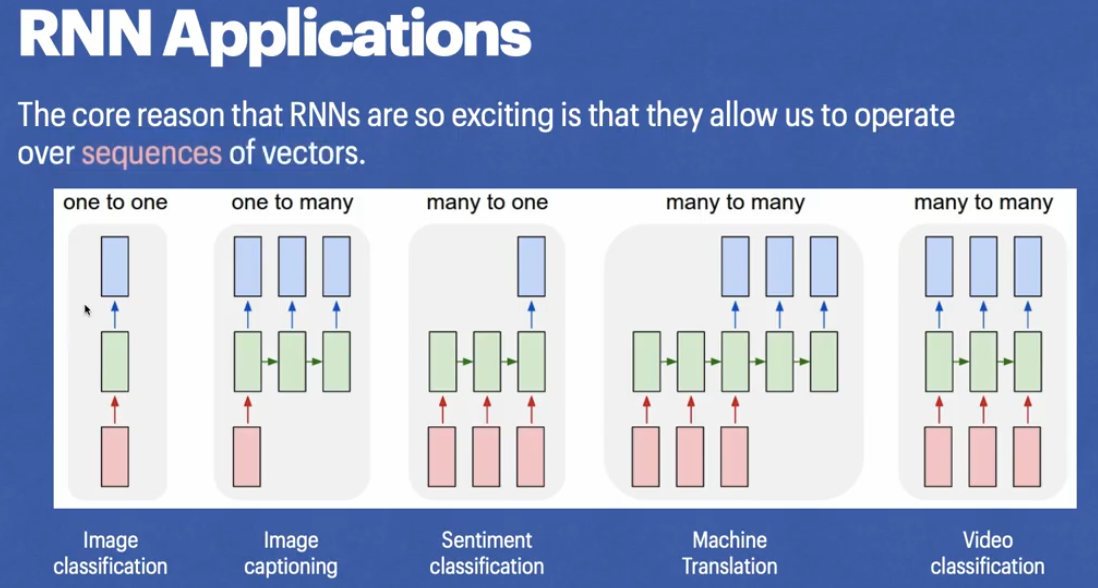

# 📚 RNN 

**Instructions:** Copy this entire content and paste it as a new Markdown cell in your RNN_Architecture_Tanglish.ipynb notebook (after the introduction cell)

---

## 1️⃣ RNN Enna? (What is RNN?)

**Recurrent Neural Network vs RNN:**

- **Normal NN:** Input → Output (one direction only)
- **RNN:** Previous step output → Current step input (memory irukum!)

**Simple Example:**

- Neenga oru sentence padikarenga, next word predict pananumna, current word mattum pothadu illa, **previous words yennamunu remember pananum**
- Example: "Chennai la nalla \_\_\_\_" → Next word "samaiyal" illa "weather" nu decide panna munnadiye words yennamunu therinjirukanum
- Adhe madiri RNN kooda previous information ah remember panni, better predictions panrum

---

## 2️⃣ RNN Key Components

### a) Hidden State (h_t) - Memory Unit

- RNN oda **brain** nu solalam
- Previous step la enna nadandhuchu nu indha hidden state la save ayidum
- Formula: `h_t = tanh(W_hh · h_{t-1} + W_xh · x_t)`
  - `h_{t-1}`: Previous memory
  - `x_t`: Current input
  - `W_hh`, `W_xh`: Weight matrices

### b) Weight Sharing

- Normal NN la each layer ku different weights
- RNN la **same weights ellam time steps kum** (memory efficient!)

---

## 3️⃣ RNN epdi Work aguthu? (How RNN Works?)

**Step-by-Step Process:**

1. **Input kudukura:** First word/data point
2. **Hidden state update:** Previous hidden state + Current input combine aagum
3. **Output generate:** Current hidden state based ah prediction
4. **Repeat:** Next word ku adhe process (previous hidden state use pannikitae)

**Key Formulas:**

- Hidden State: $h_t = \sigma(U \cdot X + W \cdot h_{t-1} + B)$
- Output: $Y = O(V \cdot h + C)$

---

## 4️⃣ BPTT - Backpropagation Through Time

- Normal NN la backpropagation use panrom
- RNN la **sequential data** irukurathaala, **time steps ellatheyum backward ah gradients calculate pananum**
- **Problem:** Long sequences la gradients very small/very large aaidum
  - **Vanishing Gradient:** Gradients romba small → Long-term memory learn pana mudiyathu
  - **Exploding Gradient:** Gradients romba big → Training unstable aaidum

---

## 5️⃣ RNN Types (Input-Output Combinations)

| **Type**         | **Input → Output**                 | **Use Case**          | **Example**                       |
| ---------------- | ---------------------------------- | --------------------- | --------------------------------- |
| **One-to-One**   | 1 input → 1 output                 | Simple classification | Image classification              |
| **One-to-Many**  | 1 input → Multiple outputs         | Sequence generation   | Image → Caption                   |
| **Many-to-One**  | Multiple inputs → 1 output         | Sentiment analysis    | Sentence → Positive/Negative      |
| **Many-to-Many** | Multiple inputs → Multiple outputs | Translation           | English sentence → Tamil sentence |

---

## 6️⃣ RNN Variants (Improved Versions)

### a) Vanilla RNN

- Simple RNN (basic version)
- Short-term dependencies mattum learn panum
- Long sequences ku not suitable

### b) LSTM (Long Short-Term Memory)

- **3 Gates irukum:**
  - **Input Gate:** New info ah add panuma nu decide
  - **Forget Gate:** Old info ah delete panuma nu decide
  - **Output Gate:** Etha output ah send panumnu decide
- Long-term memory handle pana best!

### c) GRU (Gated Recurrent Unit)

- LSTM ah vida simple (2 gates only)
- Faster training
- Performance LSTM ku similar

### d) Bidirectional RNN

- Forward + Backward rendu directions layum data process
- Full context therijrum (past + future)
- Example: Named Entity Recognition

---

## 7️⃣ RNN Advantages

✅ **Sequential memory** - Previous data remember panum  
✅ **Variable length inputs** - Different size inputs handle panlam  
✅ **Parameter sharing** - Same weights time steps ku (memory efficient)

---

## 8️⃣ RNN Limitations

❌ **Vanishing Gradient** - Long sequences ku learn pana difficult  
❌ **Exploding Gradient** - Training unstable aagalam  
❌ **Slow Training** - Sequential processing (parallel processing mudiyathu)  
❌ **Short-term memory only** (Vanilla RNN ku) - LSTM/GRU use pani solve panalam

---

## 9️⃣ Real-World Applications

📌 **Time-Series Prediction:**

- Stock market predictions
- Weather forecasting

📌 **NLP (Natural Language Processing):**

- Language translation (English → Tamil)
- Sentiment analysis (Movie review positive/negative)
- Text generation (Next word prediction)

📌 **Speech Recognition:**

- Voice assistants (Alexa, Siri)
- Speech-to-text

📌 **Video Processing:**

- Action recognition in videos
- Gesture detection

---

## 🔟 Key Takeaways

🎯 RNN = **Memory + Sequential Processing**  
🎯 Previous step output → Current step input  
🎯 BPTT use panni weights update panum  
🎯 Vanilla RNN → Short-term memory only  
🎯 LSTM/GRU → Long-term memory handle panum  
🎯 Applications: NLP, Time-series, Speech, Video

---

**Note:** Indha summary ah unga existing RNN notebook kulla paste pannunga. Students ku ellam concepts um oru quick overview kidukkum! 🚀


In [ ]:
# Copy-paste this entire block into a notebook code cell.
# Five minimal PyTorch demos: One-to-One, One-to-Many, Many-to-One, Many-to-Many (LM), Seq2Seq.
# Each demo uses tiny random tensors and prints shapes / example losses.

import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# -------------------------
# 1) One-to-One (vector -> single class)
# -------------------------
def one_to_one_demo():
    B, feat_dim, n_classes = 4, 32, 3
    x = torch.randn(B, feat_dim).to(device)
    clf = nn.Sequential(
        nn.Linear(feat_dim, 50),
        nn.ReLU(),
        nn.Linear(50, n_classes)
    ).to(device)
    logits = clf(x)
    preds = logits.argmax(dim=1)
    print("One-to-One: input", x.shape, "-> logits", logits.shape, "-> preds", preds.shape)

# -------------------------
# 2) One-to-Many (image vector -> token sequence)
# -------------------------
class Img2SeqDecoder(nn.Module):
    def __init__(self, img_dim, hidden_size, vocab_size):
        super().__init__()
        self.init_fc = nn.Linear(img_dim, hidden_size)
        self.embed = nn.Embedding(vocab_size, hidden_size)
        self.rnn = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, vocab_size)

    def forward(self, img_feat, start_tokens, seq_len):
        # img_feat: (B, img_dim), start_tokens: (B,)
        h = torch.tanh(self.init_fc(img_feat)).unsqueeze(0)        # (1, B, H)
        emb = self.embed(start_tokens).unsqueeze(1)               # (B,1,H)
        outputs = []
        for _ in range(seq_len):
            out, h = self.rnn(emb, h)                            # out: (B,1,H)
            logits = self.out(out.squeeze(1))                    # (B, V)
            outputs.append(logits.unsqueeze(1))                  # collect (B,1,V)
            pred = logits.argmax(dim=1)                          # greedy next token
            emb = self.embed(pred).unsqueeze(1)
        return torch.cat(outputs, dim=1)                         # (B, seq_len, V)

def one_to_many_demo():
    B, img_dim, H, V, seq_len = 2, 64, 32, 10, 5
    img_feat = torch.randn(B, img_dim).to(device)
    decoder = Img2SeqDecoder(img_dim, H, V).to(device)
    start_tokens = torch.zeros(B, dtype=torch.long).to(device)   # assume token 0 == <START>
    logits_seq = decoder(img_feat, start_tokens, seq_len)
    print("One-to-Many: image", img_feat.shape, "-> logits_seq", logits_seq.shape)  # (B, seq_len, V)

# -------------------------
# 3) Many-to-One (sequence -> single label)
# -------------------------
class Seq2Class(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super().__init__()
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, n_classes)

    def forward(self, x):
        # x: (B, T, F)
        _, h = self.rnn(x)                     # h: (1, B, H)
        logits = self.fc(h.squeeze(0))         # (B, n_classes)
        return logits

def many_to_one_demo():
    B, T, F, H, n_classes = 3, 6, 8, 16, 2
    x = torch.randn(B, T, F).to(device)
    model = Seq2Class(F, H, n_classes).to(device)
    logits = model(x)
    print("Many-to-One: input", x.shape, "-> logits", logits.shape)

# -------------------------
# 4) Many-to-Many (Language Model style: predict next token each time-step)
# -------------------------
class LM(nn.Module):
    def __init__(self, vocab_size, emb_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, emb_size)
        self.rnn = nn.GRU(emb_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        emb = self.embed(x)           # (B, T, E)
        out, _ = self.rnn(emb)        # (B, T, H)
        logits = self.fc(out)         # (B, T, V)
        return logits

def many_to_many_lm_demo():
    B, T, V, E, H = 2, 7, 12, 10, 20
    x = torch.randint(0, V, (B, T)).to(device)
    lm = LM(V, E, H).to(device)
    logits = lm(x)
    print("Many-to-Many LM: input", x.shape, "-> logits", logits.shape)  # (B, T, V)
    # demo loss (random targets) to show training step shape compatibility
    targets = torch.randint(0, V, (B, T)).to(device)
    loss = F.cross_entropy(logits.view(-1, V), targets.view(-1))
    print("Example LM loss:", float(loss))

# -------------------------
# 5) Seq2Seq (Encoder-Decoder, teacher forcing demo)
# -------------------------
class SimpleEncoder(nn.Module):
    def __init__(self, vocab_size, emb_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, emb_size)
        self.rnn = nn.GRU(emb_size, hidden_size, batch_first=True)

    def forward(self, src):
        emb = self.embed(src)
        _, h = self.rnn(emb)
        return h    # (1, B, H)

class SimpleDecoder(nn.Module):
    def __init__(self, vocab_size, emb_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, emb_size)
        self.rnn = nn.GRU(emb_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, tgt, hidden):
        emb = self.embed(tgt)           # (B, T, E)
        out, _ = self.rnn(emb, hidden)  # (B, T, H)
        logits = self.fc(out)           # (B, T, V_tgt)
        return logits

def seq2seq_demo():
    B, src_T, tgt_T = 2, 5, 6
    V_src, V_tgt, E, H = 15, 20, 12, 18
    src = torch.randint(0, V_src, (B, src_T)).to(device)
    tgt = torch.randint(0, V_tgt, (B, tgt_T)).to(device)   # teacher-forcing inputs
    enc = SimpleEncoder(V_src, E, H).to(device)
    dec = SimpleDecoder(V_tgt, E, H).to(device)
    hidden = enc(src)                    # (1, B, H)
    logits = dec(tgt, hidden)            # (B, tgt_T, V_tgt)
    print("Seq2Seq: src", src.shape, "tgt", tgt.shape, "-> logits", logits.shape)
    loss = F.cross_entropy(logits.view(-1, V_tgt), tgt.view(-1))
    print("Example Seq2Seq loss:", float(loss))

# -------------------------
# Run demos
# -------------------------
if __name__ == "__main__":
    print("\n--- Running demos ---\n")
    one_to_one_demo()
    one_to_many_demo()
    many_to_one_demo()
    many_to_many_lm_demo()
    seq2seq_demo()
    print("\n--- Demos finished ---\n")